In [1]:
!pip install pandas==0.23.4
!pip install pandas-profiling

     |████████████████████████████████| 8.8 MB 4.5 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.23.4 which is incompatible.
pymc3 3.11.4 requires pandas>=0.24.0, but you have pandas 0.23.4 which is incompatible.
plotnine 0.6.0 requires pandas>=0.25.0, but you have pandas 0.23.4 which is incompatible.
mizani 0.6.0 requires pandas>=0.25.0, but you have pandas 0.23.4 which is incompatible.
google-colab 1.0.0 requires pandas>=1.1.0; python_version >= "3.0", but you have pandas 0.23.4 which is incompatible.
fbprophet 0.7.1 requires pandas>=1.0.4, but you have pandas 0.23.4 which is incompatible.


Importing Necessary Libraries

In [2]:
import io
import matplotlib.pyplot as plt             
%matplotlib inline     
import pandas as pd
import numpy as np
import seaborn as sns                     
sns.set(color_codes=True)
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

Uploading Files

In [3]:
from google.colab import files
uploaded = files.upload()
printer_data = pd.read_excel('printer_data.xlsx')

uploaded = files.upload()
maintenance_quote = pd.read_excel('MaintenanceQuote.xlsx')

Saving printer_data.xlsx to printer_data.xlsx


Saving MaintenanceQuote.xlsx to MaintenanceQuote.xlsx


Exploratory data analysis

In [4]:
profile = ProfileReport(printer_data)
profile

Checking for duplicate rows and removing them

In [6]:
duplicate_rows_df = printer_data[printer_data.duplicated()]
print("number of duplicate rows in printer data: ", duplicate_rows_df.shape)

duplicate_rows_df1 = maintenance_quote[maintenance_quote.duplicated()]
print("number of duplicate rows in maintenance quote: ", duplicate_rows_df1.shape)

number of duplicate rows in printer data:  (0, 11)
number of duplicate rows in maintenance quote:  (12, 3)


In [7]:
maintenance_quote = maintenance_quote.drop_duplicates()
maintenance_quote.count()

IdentificationId       529
DeviceProductNumber    529
MaintenanceQuote       529
dtype: int64

In [8]:
print(printer_data.isnull().sum())
print(maintenance_quote.isnull().sum())

IdentificationId    0
Make                0
DeviceType          0
MonoSpeed           0
ColorSpeed          0
hasA3               0
hasA4               0
hasColor            0
hasScan             0
hasFax              0
PrinterPrice        0
dtype: int64
IdentificationId       0
DeviceProductNumber    0
MaintenanceQuote       0
dtype: int64


In [9]:
profile1 = ProfileReport(maintenance_quote)
profile1

Removing dollar sign from prices

In [10]:
printer_data['PrinterPrice'] = printer_data['PrinterPrice'].replace({'\$':''}, regex = True)
maintenance_quote['MaintenanceQuote'] = maintenance_quote['MaintenanceQuote'].replace({'\$':''},regex = True)

In [11]:
printer_data.head(5)

IdentificationId            Make      ...      hasFax  PrinterPrice
0           CN0230           Canon      ...       False        899.00
1           KM0122  Konica Minolta      ...       False       3699.00
2           XE0190           Xerox      ...        True        558.88
3           OK0017             Oki      ...       False        889.00
4           KM0123  Konica Minolta      ...       False      49855.43

[5 rows x 11 columns]

In [12]:
maintenance_quote.head(5)

IdentificationId DeviceProductNumber MaintenanceQuote
0           HP0002              CE525A           201.42
1           HP0002              CE525A           230.60
2           HP0003              CE992A           300.99
3           HP0004              CZ195A            99.00
4           HP0007              CE990A           175.99

In [13]:
printer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8910 entries, 0 to 8909
Data columns (total 11 columns):
IdentificationId    8910 non-null object
Make                8910 non-null object
DeviceType          8910 non-null object
MonoSpeed           8910 non-null float64
ColorSpeed          8910 non-null float64
hasA3               8910 non-null bool
hasA4               8910 non-null bool
hasColor            8910 non-null bool
hasScan             8910 non-null bool
hasFax              8910 non-null bool
PrinterPrice        8910 non-null object
dtypes: bool(5), float64(2), object(4)
memory usage: 461.2+ KB


Converting bool to int and categorical to numerical for model

In [14]:
printer_data[['hasA3','hasA4','hasColor','hasScan','hasFax']] = (printer_data[['hasA3','hasA4','hasColor','hasScan','hasFax']] ==True).astype(int)

In [15]:
printer_data

IdentificationId             Make      ...       hasFax   PrinterPrice
0              CN0230            Canon      ...            0         899.00
1              KM0122   Konica Minolta      ...            0        3699.00
2              XE0190            Xerox      ...            1         558.88
3              OK0017              Oki      ...            0         889.00
4              KM0123   Konica Minolta      ...            0       49855.43
5              OK0018              Oki      ...            0         399.00
6              XE0191            Xerox      ...            1        6563.99
7              RC0151            Ricoh      ...            0        3884.00
8              SG0039          Samsung      ...            0  Not_available
9              EP0079            Epson      ...            1  Not_available
10             CN0232            Canon      ...            1       17999.00
11             HP0319  Hewlett-Packard      ...            0        6013.00
12             TB0078          Toshiba      ...            1       16277.00
13             RC0152            Ricoh      ...            1         399.95
14             SP0050            Sharp      ...            1        4760.89
15             EP0081            Epson      ...            1         551.62
16             RC0153            Ricoh      ...            0        2899.00
17             RC0154            Ricoh      ...            1        5489.00
18             KY0054     Kyocera Mita      ...            0        1084.93
19             TB0080          Toshiba      ...            1        2248.00
20             HP0320  Hewlett-Packard      ...            0         129.99
21             XE0198            Xerox      ...            0         699.00
22             DL0060             Dell      ...            0  Not_available
23             CN0235            Canon      ...            1       11012.12
24             RC0155            Ricoh      ...            1        1439.00
25             XE0200            Xerox      ...            1  Not_available
26             RC0156            Ricoh      ...            1        2989.00
27             KM0124   Konica Minolta      ...            0       24995.00
28             OK0020              Oki      ...            0        4599.00
29             HP0325  Hewlett-Packard      ...            1         367.00
...               ...              ...      ...          ...            ...
8880           HP2797  Hewlett-Packard      ...            0  Not_available
8881           HP2798  Hewlett-Packard      ...            0  Not_available
8882           HP2799  Hewlett-Packard      ...            0  Not_available
8883           HP2800  Hewlett-Packard      ...            0  Not_available
8884           HP2835  Hewlett-Packard      ...            0  Not_available
8885           HP2837  Hewlett-Packard      ...            0       32000.00
8886           HP2839  Hewlett-Packard      ...            0  Not_available
8887           HP2846  Hewlett-Packard      ...            0  Not_available
8888           FX0001       Fuji Xerox      ...            1  Not_available
8889           FX0002       Fuji Xerox      ...            1  Not_available
8890           FX0003       Fuji Xerox      ...            1  Not_available
8891           KM0240   Konica Minolta      ...            0      130252.80
8892           KM0120   Konica Minolta      ...            0  Not_available
8893           GC0002              GCC      ...            0  Not_available
8894           KM0209   Konica Minolta      ...            1         999.00
8895           KM0346   Konica Minolta      ...            0  Not_available
8896           LM0669          Lexmark      ...            0         100.00
8897           LM0673          Lexmark      ...            0         149.99
8898           LM0676          Lexmark      ...            0          90.00
8899           KD0028            Kodak      ...            0      203000.00
8900           IB0038              IBM      ...      

Replacing Not_available with nan for data handling.

In [16]:
printer_data['PrinterPrice'] = printer_data['PrinterPrice'].replace({'Not_available':np.nan}, regex = True)

In [17]:
print(printer_data.isnull().sum())

IdentificationId       0
Make                   0
DeviceType             0
MonoSpeed              0
ColorSpeed             0
hasA3                  0
hasA4                  0
hasColor               0
hasScan                0
hasFax                 0
PrinterPrice        2251
dtype: int64


In [18]:
printer_data['PrinterPrice'] = printer_data['PrinterPrice'].str.replace(' ','').astype(float)

In [19]:
printer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8910 entries, 0 to 8909
Data columns (total 11 columns):
IdentificationId    8910 non-null object
Make                8910 non-null object
DeviceType          8910 non-null object
MonoSpeed           8910 non-null float64
ColorSpeed          8910 non-null float64
hasA3               8910 non-null int64
hasA4               8910 non-null int64
hasColor            8910 non-null int64
hasScan             8910 non-null int64
hasFax              8910 non-null int64
PrinterPrice        6659 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 765.8+ KB


Checking for outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


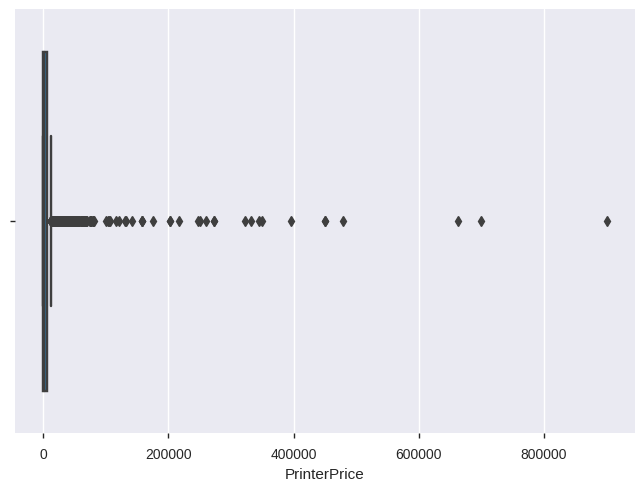

In [20]:
sns.boxplot(printer_data['PrinterPrice'])

In [25]:
index = printer_data[printer_data['PrinterPrice'] > 10000].index
print(index)
printer_data.drop(index, inplace=True)

Int64Index([  10,   12,   23,   44,   51,   81,   82,   84,   90,   91,
            ...
            8639, 8640, 8641, 8642, 8651, 8652, 8653, 8654, 8902, 8904],
           dtype='int64', length=610)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


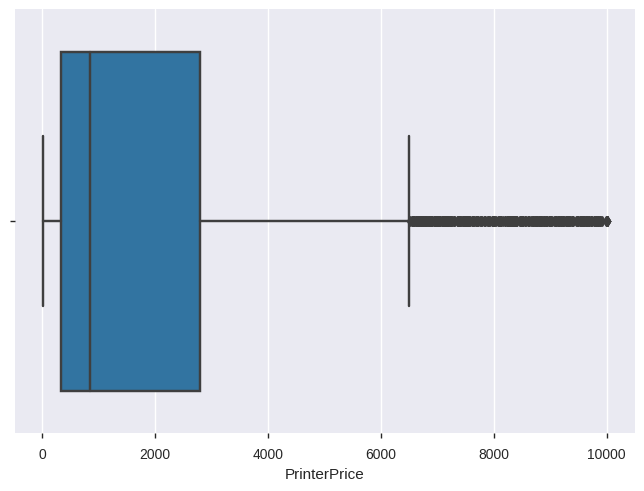

In [26]:
sns.boxplot(printer_data['PrinterPrice'])

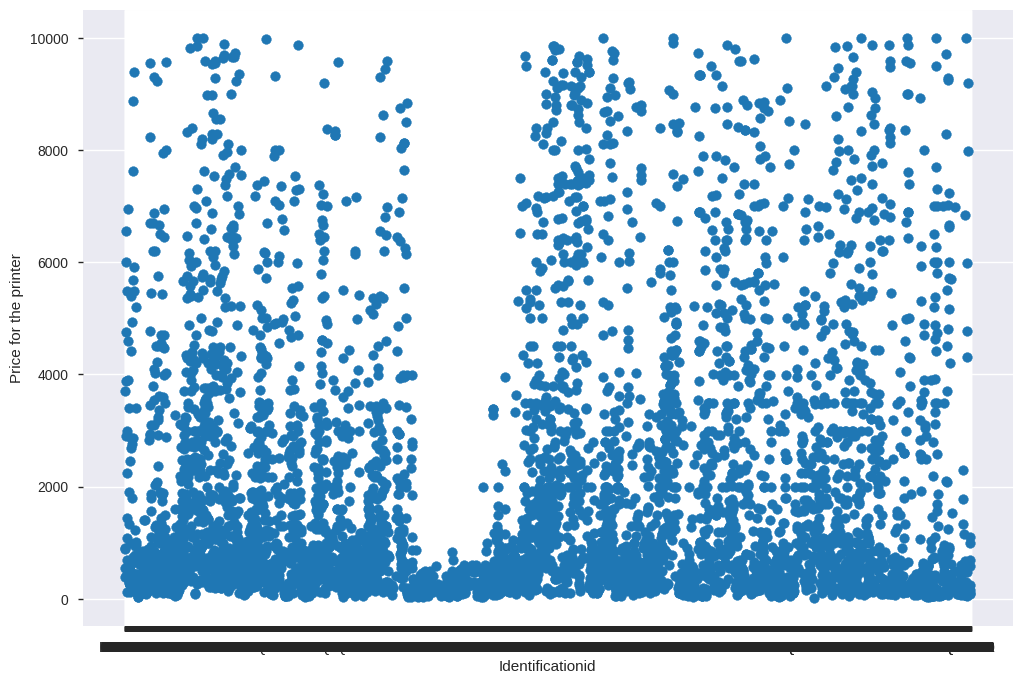

In [27]:
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(printer_data['IdentificationId'],printer_data['PrinterPrice'])
ax.set_xlabel('Identificationid')
ax.set_ylabel('Price for the printer')
plt.show()

Finding correlation between attributes

In [28]:
printer_data.corr()

MonoSpeed  ColorSpeed      ...         hasFax  PrinterPrice
MonoSpeed      1.000000    0.315305      ...       0.060758      0.345021
ColorSpeed     0.315305    1.000000      ...       0.044189      0.106401
hasA3          0.281924    0.146880      ...       0.188410      0.624301
hasA4         -0.088031   -0.065587      ...       0.012853     -0.009863
hasColor      -0.244513    0.626466      ...      -0.060372     -0.140800
hasScan       -0.044554    0.031803      ...       0.682210      0.214442
hasFax         0.060758    0.044189      ...       1.000000      0.302138
PrinterPrice   0.345021    0.106401      ...       0.302138      1.000000

[8 rows x 8 columns]

Will include monospeed,hasFax and hasA3  for predicting printer price because of the good correlation they have with printer price.


In [52]:
data = pd.DataFrame()
data = printer_data[['MonoSpeed','hasA3','hasFax','PrinterPrice']] #copying the data in new dataframe so that it not affects original one.

In [53]:
print(data.info())
print(printer_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7843 entries, 0 to 8909
Data columns (total 4 columns):
MonoSpeed       7843 non-null float64
hasA3           7843 non-null int64
hasFax          7843 non-null int64
PrinterPrice    5592 non-null float64
dtypes: float64(2), int64(2)
memory usage: 306.4 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7843 entries, 0 to 8909
Data columns (total 11 columns):
IdentificationId    7843 non-null object
Make                7843 non-null object
DeviceType          7843 non-null object
MonoSpeed           7843 non-null float64
ColorSpeed          7843 non-null float64
hasA3               7843 non-null int64
hasA4               7843 non-null int64
hasColor            7843 non-null int64
hasScan             7843 non-null int64
hasFax              7843 non-null int64
PrinterPrice        5592 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 735.3+ KB
None


In [54]:
data

MonoSpeed  hasA3  hasFax  PrinterPrice
0          33.0      0       0        899.00
1          35.0      1       0       3699.00
2          23.0      0       1        558.88
3          34.0      0       0        889.00
5          23.0      0       0        399.00
6          32.0      1       1       6563.99
7          40.0      1       0       3884.00
8          21.0      0       0           NaN
9          15.0      0       1           NaN
11         21.0      1       0       6013.00
13         29.0      0       1        399.95
14         70.0      1       1       4760.89
15         15.0      0       1        551.62
16         32.0      1       0       2899.00
17         30.0      1       1       5489.00
18         21.0      0       0       1084.93
19         25.0      1       1       2248.00
20         12.0      0       0        129.99
21         30.0      0       0        699.00
22         25.0      0       0           NaN
24         30.0      0       1       1439.00
25         65.0      1       1           NaN
26         40.0      0       1       2989.00
28         40.0      1       0       4599.00
29         33.0      0       1        367.00
30         20.0      0       0        449.00
31         35.0      0       1        399.99
32          7.0      0       0           NaN
33         33.0      0       1       3900.00
34         25.0      0       1           NaN
...         ...    ...     ...           ...
8875       75.0      1       1       7985.00
8876      272.0      1       0           NaN
8877        1.0      0       0         94.50
8878        4.0      0       0           NaN
8879       18.0      0       1           NaN
8880       28.0      0       0           NaN
8881       28.0      0       0           NaN
8882       28.0      0       0           NaN
8883       28.0      0       0           NaN
8884      240.0      0       0           NaN
8886      240.0      1       0           NaN
8887      240.0      1       0           NaN
8888       55.0      1       1           NaN
8889       35.0      1       1           NaN
8890       45.0      1       1           NaN
8892       80.0      1       0           NaN
8893       12.0      0       0           NaN
8894       20.0      0       1        999.00
8895      125.0      1       0           NaN
8896       22.0      0       0        100.00
8897       11.0      0       0        149.99
8898       15.0      0       0         90.00
8900       77.0      0       0           NaN
8901       16.0      0       0       1099.00
8903       17.0      0       1        579.00
8905       25.0      0       0        699.00
8906        9.2      1       0        249.99
8907        4.0      0       0           NaN
8908       16.0      0       0           NaN
8909       20.0      1       0           NaN

[7843 rows x 4 columns]

In [55]:
test_data = data[data['PrinterPrice'].isnull()]
data.dropna(inplace=True)
y_test = data
y_train = data['PrinterPrice']
x_train = data.drop('PrinterPrice',axis=1)
x_test = test_data.drop('PrinterPrice',axis=1)

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
#r2score = r2_score(y_test,y_pred)

ValueError: ignored

In [59]:
printer_data.loc[printer_data.PrinterPrice.isnull(),'PrinterPrice'] = y_pred.round(2)

In [60]:
inde = printer_data[printer_data['PrinterPrice']<0].index
printer_data.drop(inde,inplace=True)

In [61]:
printer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7807 entries, 0 to 8909
Data columns (total 11 columns):
IdentificationId    7807 non-null object
Make                7807 non-null object
DeviceType          7807 non-null object
MonoSpeed           7807 non-null float64
ColorSpeed          7807 non-null float64
hasA3               7807 non-null int64
hasA4               7807 non-null int64
hasColor            7807 non-null int64
hasScan             7807 non-null int64
hasFax              7807 non-null int64
PrinterPrice        7807 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 731.9+ KB


In [62]:
maintain_quote = maintenance_quote.copy()

In [63]:
maintain_quote = pd.merge(maintain_quote,printer_data,on='IdentificationId')

In [64]:
maintain_quote

IdentificationId DeviceProductNumber     ...      hasFax PrinterPrice
0             HP0002              CE525A     ...           0      1498.00
1             HP0002              CE525A     ...           0      1498.00
2             HP0003              CE992A     ...           0      1800.00
3             HP0004              CZ195A     ...           0       528.86
4             HP0007              CE990A     ...           0      1148.72
5             HP0010              CF399A     ...           0       495.29
6             HP0011              C8049A     ...           0      1405.00
7             HP0018              CE995A     ...           0      1749.00
8             HP0019              C5F94A     ...           0       382.06
9             HP0025              CB414A     ...           1      2349.00
10            HP0026              CF278A     ...           0       509.00
11            HP0029              CF286A     ...           1       499.00
12            HP0034          CF116A#BGJ     ...           1      1499.94
13            HP0039              F2A68A     ...           0       499.99
14            HP0054              E6B72A     ...           0      1142.46
15            HP0064              F6W14A     ...           1       268.98
16            HP0070              E6B67A     ...           0      1578.87
17            HP0073              C7064A     ...           0       849.95
18            HP0076              F2A76A     ...           1      1249.95
19            HP0084              CF236A     ...           0      1903.38
20            HP0086              F6W15A     ...           1       263.99
21            HP0089              CB532A     ...           1       949.99
22            HP0097              Q7829A     ...           1      4800.00
23            HP0097              Q7829A     ...           1      4800.00
24            HP0098              CF285A     ...           0       573.00
25            HP0101              Q1860A     ...           0      1598.87
26            HP0105              CZ244A     ...           0      4343.17
27            HP0112              CF066A     ...           1      2989.00
28            HP0118              CE457A     ...           0       547.87
29            HP0121              C5F95A     ...           0       445.94
..               ...                 ...     ...         ...          ...
326           HP2896              W1A79A     ...           1       399.99
327           HP2897              W1A80A     ...           1       399.99
328           HP2894              W1A77A     ...           0      3041.00
329           HP2895              W1A78A     ...           1      3102.00
330           HP2899              W1Y44A     ...           0       299.99
331           HP2900              W1Y45A     ...           0       299.99
332           HP2898              W1Y43A     ...           0      2910.00
333           HP3006              W1A66A     ...           0       145.00
334           HP2901              T3U43A     ...           0      2499.99
335           HP2982              1PU51A     ...           0      1073.54
336           HP2983              1PS54A     ...           1      3185.73
337           HP2984              1PS55A     ...           1      2590.74
338           HP2915              4ZB94A     ...           0       224.05
339           HP2916              4ZB95A     ...           0       233.00
340           HP2919              4ZB97A     ...           1       299.99
341           HP2940              CX040A     ...           0       310.45
342           HP2941              CX038A     ...           0       145.27
343           HP2944              CX058A     ...           0       600.94
344           HP2945              CX057A     ...           0       163.00
345           HP2947              CX059A     ...           0       349.99
346           HP2948              T8W56A     ...           0        59.00
347           HP2985              3GY31A     ...           1      2827.00
348     

In [65]:
maintain_quote['MaintenanceQuote'] = maintain_quote['MaintenanceQuote'].replace({'Not_available':np.nan}, regex = True)
maintain_quote['MaintenanceQuote'] = maintain_quote['MaintenanceQuote'].str.replace(' ','').astype(float)

In [66]:
maintain_quote.drop_duplicates(subset ="IdentificationId",keep = False, inplace = True)

In [67]:
maintain_quote

IdentificationId DeviceProductNumber     ...       hasFax PrinterPrice
2             HP0003              CE992A     ...            0      1800.00
3             HP0004              CZ195A     ...            0       528.86
4             HP0007              CE990A     ...            0      1148.72
5             HP0010              CF399A     ...            0       495.29
6             HP0011              C8049A     ...            0      1405.00
7             HP0018              CE995A     ...            0      1749.00
8             HP0019              C5F94A     ...            0       382.06
9             HP0025              CB414A     ...            1      2349.00
10            HP0026              CF278A     ...            0       509.00
11            HP0029              CF286A     ...            1       499.00
12            HP0034          CF116A#BGJ     ...            1      1499.94
13            HP0039              F2A68A     ...            0       499.99
14            HP0054              E6B72A     ...            0      1142.46
15            HP0064              F6W14A     ...            1       268.98
16            HP0070              E6B67A     ...            0      1578.87
17            HP0073              C7064A     ...            0       849.95
18            HP0076              F2A76A     ...            1      1249.95
19            HP0084              CF236A     ...            0      1903.38
20            HP0086              F6W15A     ...            1       263.99
21            HP0089              CB532A     ...            1       949.99
24            HP0098              CF285A     ...            0       573.00
25            HP0101              Q1860A     ...            0      1598.87
26            HP0105              CZ244A     ...            0      4343.17
27            HP0112              CF066A     ...            1      2989.00
28            HP0118              CE457A     ...            0       547.87
29            HP0121              C5F95A     ...            0       445.94
30            HP0140              Q6500A     ...            1       882.00
31            HP0146              F2A69A     ...            0       957.06
32            HP0148              CF367A     ...            1      9986.33
33            RC0012            MP301SPF     ...            1      1563.71
..               ...                 ...     ...          ...          ...
322           DL0207            S3845CDN     ...            0       999.99
323           HP2513              A7W97D     ...            1      6391.23
324           HP2518              D3Q16D     ...            0       449.99
325           HP2890              W1A30A     ...            1       319.99
326           HP2896              W1A79A     ...            1       399.99
327           HP2897              W1A80A     ...            1       399.99
328           HP2894              W1A77A     ...            0      3041.00
329           HP2895              W1A78A     ...            1      3102.00
330           HP2899              W1Y44A     ...            0       299.99
331           HP2900              W1Y45A     ...            0       299.99
332           HP2898              W1Y43A     ...            0      2910.00
333           HP3006              W1A66A     ...            0       145.00
334           HP2901              T3U43A     ...            0      2499.99
335           HP2982              1PU51A     ...            0      1073.54
336           HP2983              1PS54A     ...            1      3185.73
337           HP2984              1PS55A     ...            1      2590.74
338           HP2915              4ZB94A     ...            0       224.05
339           HP2916              4ZB95A     ...            0       233.00
340           HP2919              4ZB97A     ...            1       299.99
341           HP2940              CX040A     ...            0       310.45
342           HP2941              CX038A     ...            0       145.27
343           HP2944         

In [68]:
profile3 = ProfileReport(maintain_quote)
profile3

In [69]:
maintain_quote.corr()

MaintenanceQuote      ...       PrinterPrice
MaintenanceQuote          1.000000      ...           0.804326
MonoSpeed                 0.379222      ...           0.387904
ColorSpeed                0.258201      ...           0.299749
hasA3                     0.691606      ...           0.649311
hasA4                          NaN      ...                NaN
hasColor                  0.043986      ...           0.067256
hasScan                   0.382751      ...           0.359780
hasFax                    0.375324      ...           0.363662
PrinterPrice              0.804326      ...           1.000000

[9 rows x 9 columns]

In [70]:
print(maintain_quote.isnull().sum())

IdentificationId        0
DeviceProductNumber     0
MaintenanceQuote       17
Make                    0
DeviceType              0
MonoSpeed               0
ColorSpeed              0
hasA3                   0
hasA4                   0
hasColor                0
hasScan                 0
hasFax                  0
PrinterPrice            0
dtype: int64


In [71]:
maintain_quote.dropna(inplace=True)
maintain_quote.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 2 to 353
Data columns (total 13 columns):
IdentificationId       317 non-null object
DeviceProductNumber    317 non-null object
MaintenanceQuote       317 non-null float64
Make                   317 non-null object
DeviceType             317 non-null object
MonoSpeed              317 non-null float64
ColorSpeed             317 non-null float64
hasA3                  317 non-null int64
hasA4                  317 non-null int64
hasColor               317 non-null int64
hasScan                317 non-null int64
hasFax                 317 non-null int64
PrinterPrice           317 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 34.7+ KB


In [72]:
maintain_quote.corr()

MaintenanceQuote      ...       PrinterPrice
MaintenanceQuote          1.000000      ...           0.804326
MonoSpeed                 0.379222      ...           0.395917
ColorSpeed                0.258201      ...           0.295126
hasA3                     0.691606      ...           0.651994
hasA4                          NaN      ...                NaN
hasColor                  0.043986      ...           0.060881
hasScan                   0.382751      ...           0.358844
hasFax                    0.375324      ...           0.365206
PrinterPrice              0.804326      ...           1.000000

[9 rows x 9 columns]

In [73]:
lb_make = LabelEncoder()
maintain_quote['DeviceType'] = lb_make.fit_transform(maintain_quote['DeviceType'])
maintain_quote.head(10)

IdentificationId DeviceProductNumber     ...       hasFax PrinterPrice
2            HP0003              CE992A     ...            0      1800.00
3            HP0004              CZ195A     ...            0       528.86
4            HP0007              CE990A     ...            0      1148.72
5            HP0010              CF399A     ...            0       495.29
6            HP0011              C8049A     ...            0      1405.00
8            HP0019              C5F94A     ...            0       382.06
9            HP0025              CB414A     ...            1      2349.00
10           HP0026              CF278A     ...            0       509.00
11           HP0029              CF286A     ...            1       499.00
12           HP0034          CF116A#BGJ     ...            1      1499.94

[10 rows x 13 columns]

In [74]:
maintain_quote.corr()

MaintenanceQuote      ...       PrinterPrice
MaintenanceQuote          1.000000      ...           0.804326
DeviceType                0.341684      ...           0.340824
MonoSpeed                 0.379222      ...           0.395917
ColorSpeed                0.258201      ...           0.295126
hasA3                     0.691606      ...           0.651994
hasA4                          NaN      ...                NaN
hasColor                  0.043986      ...           0.060881
hasScan                   0.382751      ...           0.358844
hasFax                    0.375324      ...           0.365206
PrinterPrice              0.804326      ...           1.000000

[10 rows x 10 columns]

Building Model

In [75]:
model_data = maintain_quote.copy()

In [76]:
model_data.drop(['IdentificationId','DeviceProductNumber','Make','ColorSpeed','hasA4','hasColor'],axis = 1,inplace=True)

In [77]:
model_data

MaintenanceQuote  DeviceType      ...       hasFax  PrinterPrice
2              300.99           0      ...            0       1800.00
3               99.00           0      ...            0        528.86
4              175.99           0      ...            0       1148.72
5               99.00           0      ...            0        495.29
6              294.99           0      ...            0       1405.00
8               99.00           0      ...            0        382.06
9              649.00           2      ...            1       2349.00
10              99.00           0      ...            0        509.00
11             179.00           2      ...            1        499.00
12             599.00           2      ...            1       1499.94
13             229.00           0      ...            0        499.99
14             469.00           0      ...            0       1142.46
15             169.00           2      ...            1        268.98
17             156.63           0      ...            0        849.95
18             599.00           2      ...            1       1249.95
19             449.00           0      ...            0       1903.38
20             169.00           2      ...            1        263.99
21             198.55           2      ...            1        949.99
24              99.00           0      ...            0        573.00
25             499.00           0      ...            0       1598.87
26            1247.99           0      ...            0       4343.17
27            1099.00           2      ...            1       2989.00
28              40.84           0      ...            0        547.87
29              99.00           0      ...            0        445.94
30             260.45           2      ...            1        882.00
31             229.00           0      ...            0        957.06
32            3405.99           2      ...            1       9986.33
33             199.00           2      ...            1       1563.71
34             149.00           0      ...            0        701.50
36             219.00           0      ...            0        692.45
..                ...         ...      ...          ...           ...
322            167.99           3      ...            0        999.99
323            989.00           3      ...            1       6391.23
324            189.00           1      ...            0        449.99
325            169.00           2      ...            1        319.99
326            259.00           3      ...            1        399.99
327            259.00           3      ...            1        399.99
328            259.00           3      ...            0       3041.00
329            259.00           3      ...            1       3102.00
330            119.00           1      ...            0        299.99
331            119.00           1      ...            0        299.99
332            119.00           1      ...            0       2910.00
333             99.00           0      ...            0        145.00
334            899.00           1      ...            0       2499.99
335            279.00           0      ...            0       1073.54
336            749.00           2      ...            1       3185.73
337            749.00           2      ...            1       2590.74
338             55.00           1      ...            0        224.05
339             55.00           1      ...            0        233.00
340             55.00           3      ...            1        299.99
341             15.23           3      ...            0        310.45
342             15.23           3      ...            0        145.27
343             15.23           3      ...            0        600.94
344             15.23           3      ...            0        163.00
345             15.23           3      ...            0        349.99
346             15.23           3      ...            0         59.00
347           1

In [130]:
x = model_data.iloc[:,1:]
y = model_data.iloc[:,0:1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=3)
regr = LinearRegression()

regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)


Checking accuracy of our model

In [135]:
MAE = metrics.mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
min = model_data['MaintenanceQuote'].min()
max = model_data['MaintenanceQuote'].max()
Normalized_RMSE = RMSE / ((max)-(min)) #if close to 0 represents better fitted model, ranges from 0 to 1
MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred) #Lower the MAPE, better fit is the model.
R2_accuracy = r2_score(y_test,y_pred) #r2 score for perfect model is 1.0
print('Mean absolute error :',MAE)
print('Normalised root mean square error :',Normalized_RMSE)
print('Mean absolute percentage error :',MAPE)
print('Coefficient of Determination :',R2_accuracy)
print('train score : %f' %(regr.score(x_train,y_train)))
print('test score : %f' %(regr.score(x_test,y_test)))
trainn = regr.score(x_train,y_train)
testt = regr.score(x_test,y_test)
print('Difference between testing and training score is :',abs(testt-trainn))

Mean absolute error : 171.89484423530482
Normalised root mean square error : 0.0821026410714828
Mean absolute percentage error : 0.7239463073454453
Coefficient of Determination : 0.7412067344303175
train score : 0.712987
test score : 0.741207
Difference between testing and training score is : 0.02821939332990453
